In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [128]:
train_df = pd.read_csv("../data/train.csv")

In [70]:
all_columns = train_df.columns
all_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [71]:
numeric_columns = list(train_df.select_dtypes([np.number]).columns)
numeric_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [72]:
non_numeric_columns = list(set(all_columns)-set(numeric_columns))
non_numeric_columns

['MasVnrType',
 'Heating',
 'SaleType',
 'LotShape',
 'BsmtCond',
 'GarageQual',
 'Electrical',
 'Functional',
 'HouseStyle',
 'KitchenQual',
 'GarageCond',
 'ExterCond',
 'GarageType',
 'ExterQual',
 'HeatingQC',
 'Alley',
 'BldgType',
 'PavedDrive',
 'RoofMatl',
 'Exterior1st',
 'BsmtExposure',
 'BsmtFinType2',
 'Neighborhood',
 'MSZoning',
 'CentralAir',
 'Condition2',
 'PoolQC',
 'SaleCondition',
 'LandSlope',
 'Fence',
 'Utilities',
 'GarageFinish',
 'MiscFeature',
 'LotConfig',
 'RoofStyle',
 'Exterior2nd',
 'Foundation',
 'FireplaceQu',
 'LandContour',
 'Condition1',
 'Street',
 'BsmtQual',
 'BsmtFinType1']

In [73]:
columns_with_nan = train_df.columns[train_df.isna().any()].tolist()

In [74]:
columns_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [129]:
simple_imputer = SimpleImputer()
knn_imputer = KNNImputer()

In [130]:
train_df["GarageYrBlt"] = simple_imputer.fit_transform(train_df[["GarageYrBlt"]]).ravel()

In [131]:
train_df["LotFrontage"] = simple_imputer.fit_transform(train_df[["LotFrontage"]]).ravel()

In [132]:
train_df["MasVnrArea"] = simple_imputer.fit_transform(train_df[["MasVnrArea"]]).ravel()

In [133]:
train_df["Alley"] = train_df["Alley"].fillna(train_df["Alley"].value_counts().index[0])

In [134]:
def major_presence_impute(column_name_list, data_frame):
    for column in column_name_list:
        data_frame[column] = data_frame[column].fillna(data_frame[column].value_counts().index[0])

In [135]:
major_presence_impute(columns_with_nan, train_df)

In [136]:
label_encoder = LabelEncoder()

In [137]:
for column in non_numeric_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column].values)

In [84]:
train_df_corr_matrix = train_df.corr()

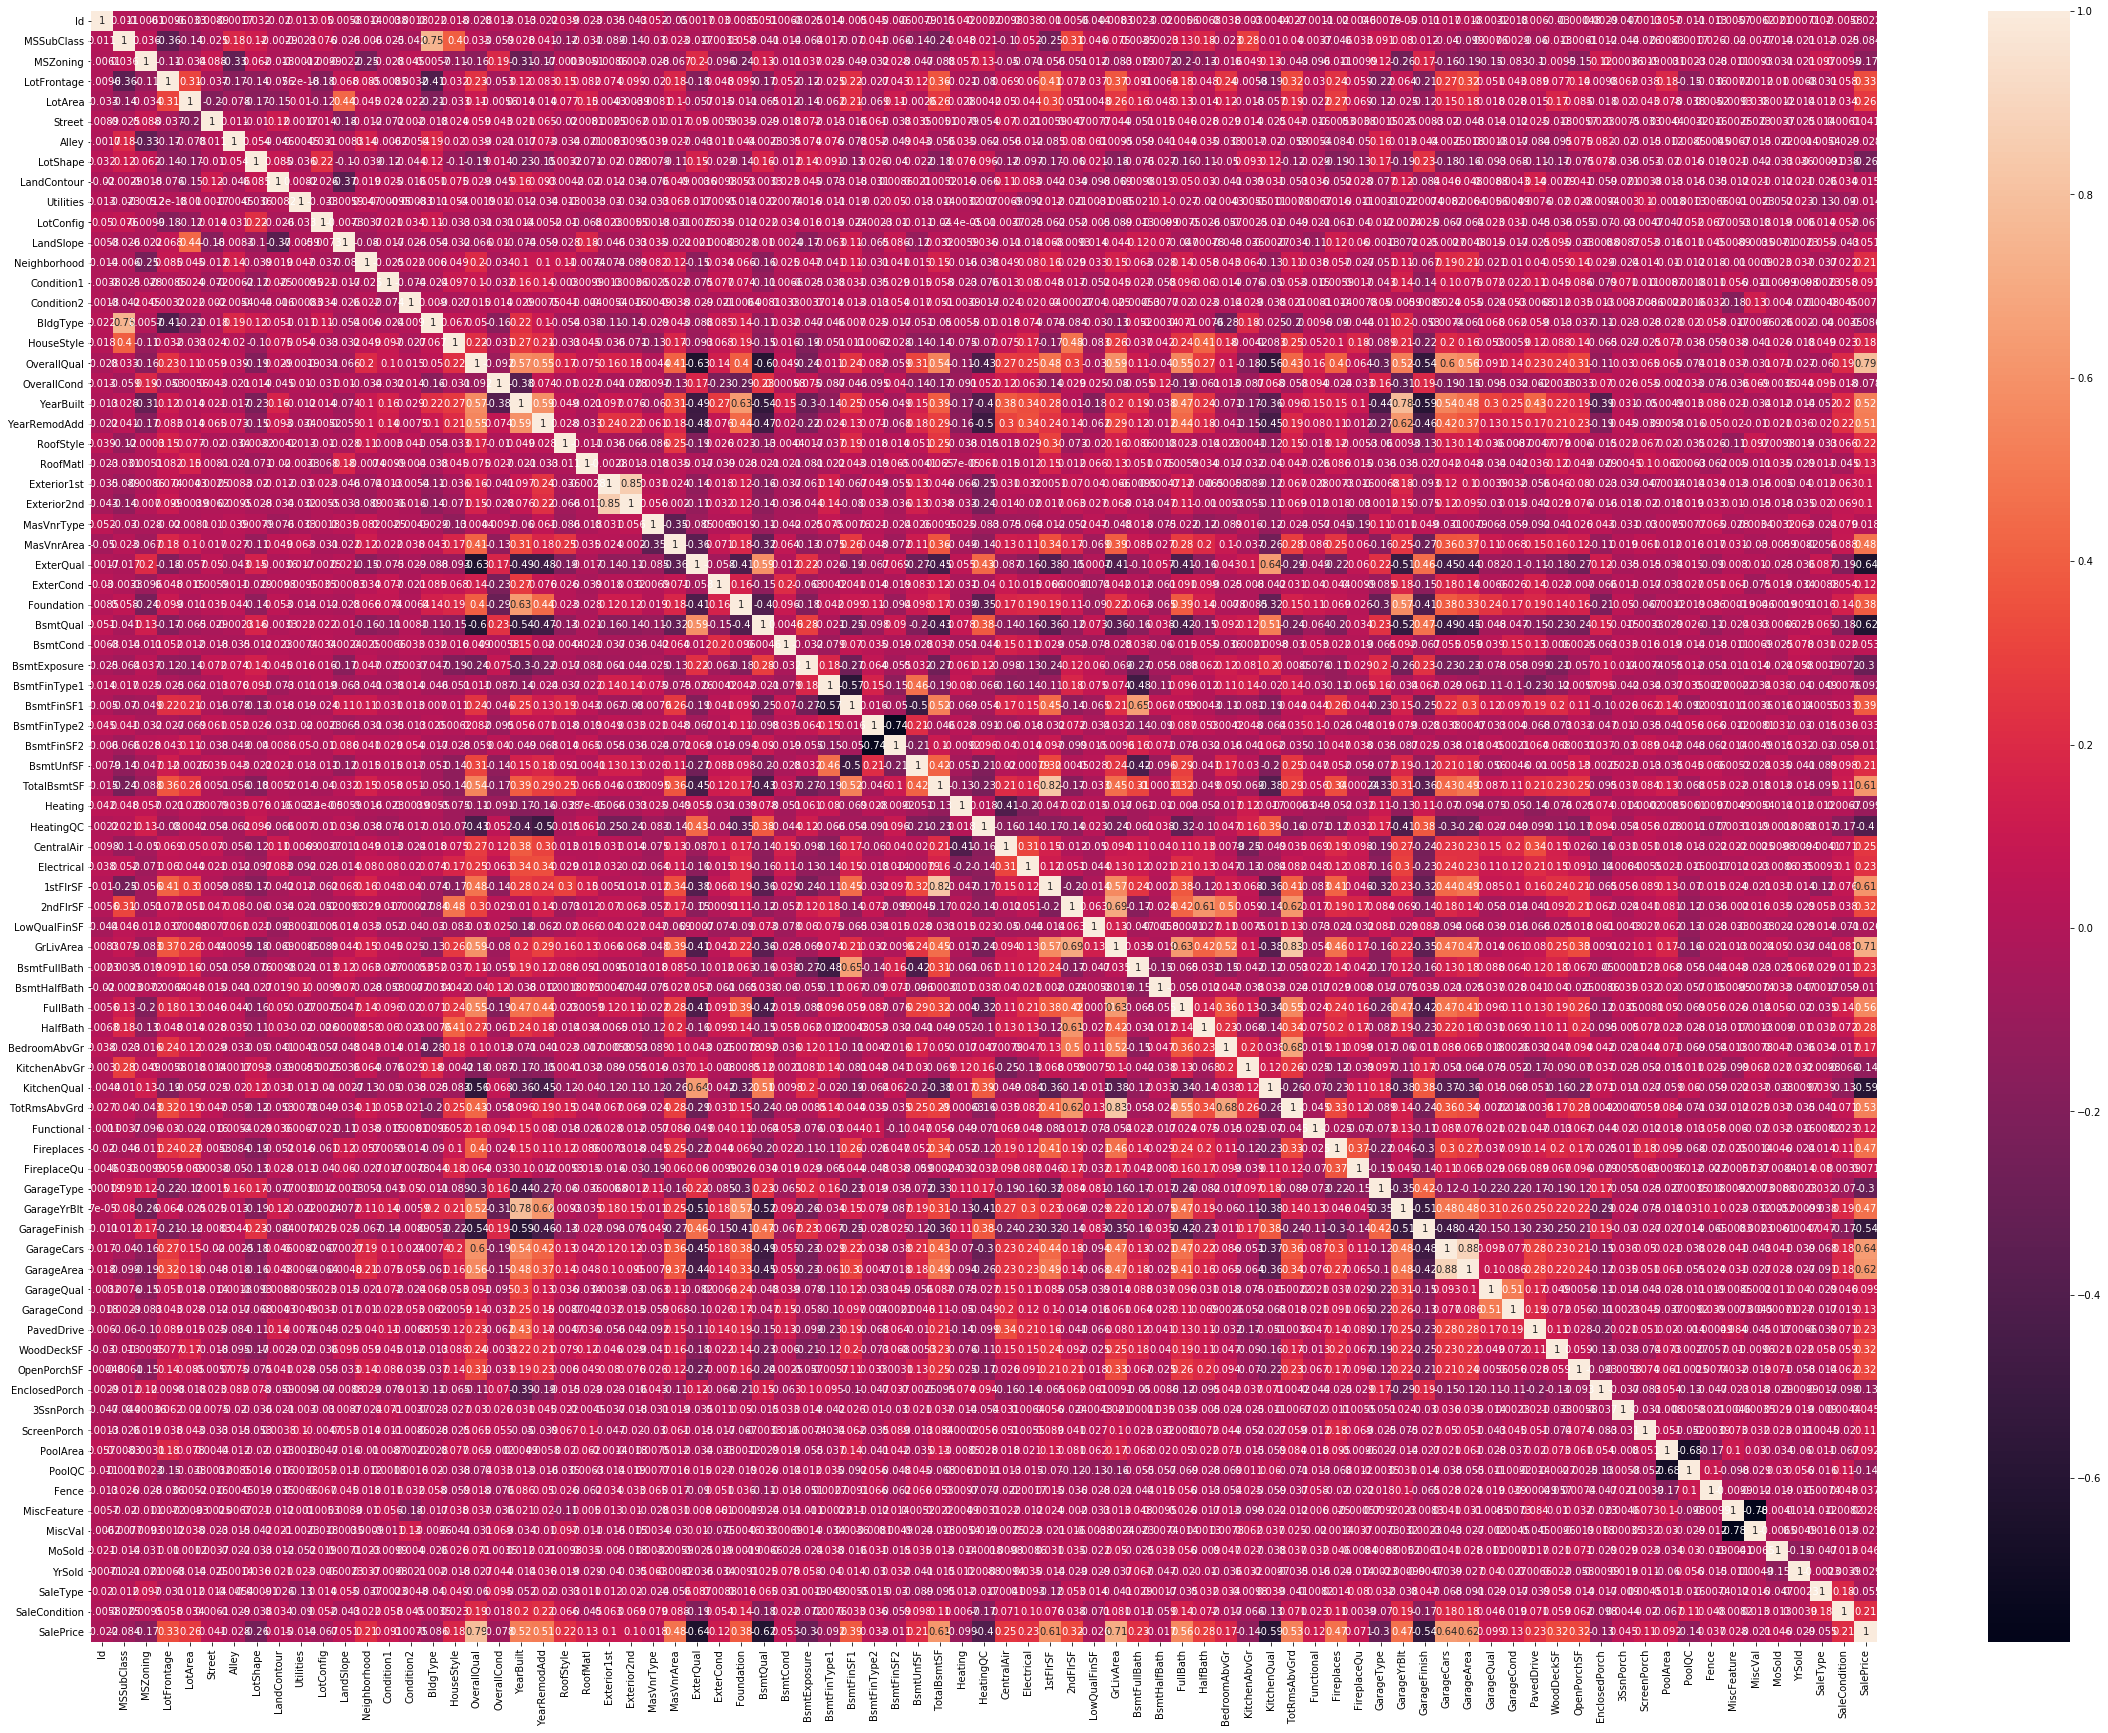

In [85]:
plt.figure(figsize=(40,30))
sns.heatmap(train_df_corr_matrix, annot=True)

In [138]:
train_df_subset = train_df[["OverallQual" ,"TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageCars", "GarageArea"]]

In [139]:
train_df_subset

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
...,...,...,...,...,...,...
1455,6,953,953,1647,2,460
1456,6,1542,2073,2073,2,500
1457,7,1152,1188,2340,1,252
1458,5,1078,1078,1078,1,240


In [140]:
train_y =  train_df[["SalePrice"]].values

In [141]:
train_y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [142]:
train_x = train_df_subset.values

In [143]:
train_x

array([[   7,  856,  856, 1710,    2,  548],
       [   6, 1262, 1262, 1262,    2,  460],
       [   7,  920,  920, 1786,    2,  608],
       ...,
       [   7, 1152, 1188, 2340,    1,  252],
       [   5, 1078, 1078, 1078,    1,  240],
       [   5, 1256, 1256, 1256,    1,  276]], dtype=int64)

In [144]:
test_df = pd.read_csv("../data/test.csv")

In [145]:
test_df["TotalBsmtSF"] = simple_imputer.fit_transform(test_df[["TotalBsmtSF"]]).ravel()
test_df["GarageCars"] = simple_imputer.fit_transform(test_df[["GarageCars"]]).ravel()
test_df["GarageArea"] = simple_imputer.fit_transform(test_df[["GarageArea"]]).ravel()

In [146]:
test_df_subset = test_df[["OverallQual" ,"TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageCars", "GarageArea"]]

In [147]:
test_x = test_df_subset.values

In [148]:
test_x

array([[5.000e+00, 8.820e+02, 8.960e+02, 8.960e+02, 1.000e+00, 7.300e+02],
       [6.000e+00, 1.329e+03, 1.329e+03, 1.329e+03, 1.000e+00, 3.120e+02],
       [5.000e+00, 9.280e+02, 9.280e+02, 1.629e+03, 2.000e+00, 4.820e+02],
       ...,
       [5.000e+00, 1.224e+03, 1.224e+03, 1.224e+03, 2.000e+00, 5.760e+02],
       [5.000e+00, 9.120e+02, 9.700e+02, 9.700e+02, 0.000e+00, 0.000e+00],
       [7.000e+00, 9.960e+02, 9.960e+02, 2.000e+03, 3.000e+00, 6.500e+02]])

In [106]:
decision_tree_regressor = DecisionTreeRegressor(criterion="mse", max_depth=7)

In [107]:
cross_validate(decision_tree_regressor, train_x, train_y, cv=10, scoring=["r2", "neg_root_mean_squared_error"])

{'fit_time': array([0.00398707, 0.00299048, 0.00199413, 0.00299191, 0.00199413,
        0.00199389, 0.00199604, 0.00199389, 0.00199461, 0.00199413]),
 'score_time': array([0.00099826, 0.        , 0.        , 0.        , 0.00099778,
        0.00099778, 0.00099635, 0.00099754, 0.00099754, 0.00099802]),
 'test_r2': array([0.71033214, 0.77325561, 0.82856641, 0.45275397, 0.80937188,
        0.77893913, 0.80817335, 0.82025576, 0.81112726, 0.79297485]),
 'test_neg_root_mean_squared_error': array([-36656.7437077 , -37861.77130761, -32810.52507258, -61278.63309787,
        -42004.52666259, -36097.8996732 , -31409.69734995, -29944.03907608,
        -39078.66783311, -32931.99563134])}

In [108]:
decision_tree_regressor.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [109]:
decision_tree_regressor.score(train_x, train_y)

0.9213321235987313

In [110]:
predictions = decision_tree_regressor.predict(test_x)

In [111]:
sub = pd.read_csv("../data/sample_submission.csv")
sub = sub[["Id"]]
sub["SalePrice"] = predictions
sub.to_csv("../data/decision_tree_regressor.csv", index=False)

In [113]:
linear_regression = LinearRegression(fit_intercept=True, normalize=True)

In [114]:
linear_regression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [116]:
linear_regression.score(train_x, train_y)

0.7619179511862831

In [118]:
predictions=linear_regression.predict(test_x)

In [119]:
sub = pd.read_csv("../data/sample_submission.csv")
sub = sub[["Id"]]
sub["SalePrice"] = predictions
sub.to_csv("../data/decision_tree_regressor.csv", index=False)

# Robust scaler

In [121]:
robust_scaler = RobustScaler(with_centering=True, with_scaling=True)

In [122]:
train_x = robust_scaler.fit_transform(train_x)

In [123]:
test_x = robust_scaler.fit_transform(test_x)

In [124]:
decision_tree_regressor.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [125]:
predictions = decision_tree_regressor.predict(test_x)

In [126]:
decision_tree_regressor.score(train_x, train_y)

0.9213321235987313

In [127]:
sub = pd.read_csv("../data/sample_submission.csv")
sub = sub[["Id"]]
sub["SalePrice"] = predictions
sub.to_csv("../data/decision_tree_regressor.csv", index=False)

# MinMax Scaler

In [149]:
min_max_scaler = MinMaxScaler()

In [150]:
train_x = min_max_scaler.fit_transform(train_x)

In [151]:
test_x = min_max_scaler.fit_transform(test_x)

In [152]:
decision_tree_regressor.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [153]:
predictions = decision_tree_regressor.predict(test_x)

In [154]:
decision_tree_regressor.score(train_x, train_y)

0.9213321235987313

In [155]:
sub = pd.read_csv("../data/sample_submission.csv")
sub = sub[["Id"]]
sub["SalePrice"] = predictions
sub.to_csv("../data/decision_tree_regressor.csv", index=False)